## **Load Library**

In [30]:
import os
import warnings
warnings.filterwarnings('ignore')

print("Importing library...\n")

import cv2
import PIL
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib
import mediapipe as mp
import ipywidgets as widgets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T
from huggingface_hub import hf_hub_download

print(f"Torch   : {torch.__version__}")
print(f"MediaPipe   : {mp.__version__}")
print(f"OpenCV      : {cv2.__version__}")
print(f"NumPy       : {np.__version__}")
print(f"Pandas      : {pd.__version__}")
print(f"Seaborn     : {sns.__version__}")
print(f"Pillow      : {PIL.__version__}")
print(f"Matplotlib  : {matplotlib.__version__}")

print("\nAll library loaded successfully")

Importing library...

Torch   : 2.9.1+cpu
MediaPipe   : 0.10.14
OpenCV      : 4.12.0
NumPy       : 2.1.3
Pandas      : 2.3.3
Seaborn     : 0.13.2
Pillow      : 12.0.0
Matplotlib  : 3.10.7

All library loaded successfully


## **Load Pre-Trained Model and Predict Test**

In [31]:
import torch
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image
from IPython.display import Image as IPImage, display
from huggingface_hub import hf_hub_download

# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Download model
print("Downloading model from Hugging Face...")
model_path = hf_hub_download(
    repo_id="fahd9999/face_shape_classification",
    filename="model_85_nn_.pth"
)
print(f"✓ Model downloaded to: {model_path}")

# Load model
print("Loading model...")
model = torch.load(model_path, map_location=torch.device(device), weights_only=False)
model.eval()
model.to(device)
print("✓ Model loaded successfully!")
print("-" * 60)

# Preprocessing
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Class names
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

Using device: cpu
✓ Model downloaded to: C:\Users\ADVAN\.cache\huggingface\hub\models--fahd9999--face_shape_classification\snapshots\537861ef28ac2cca7bd0228170013b0f5d9e5f04\model_85_nn_.pth
Loading model...
✓ Model loaded successfully!
------------------------------------------------------------


Test Model on Female


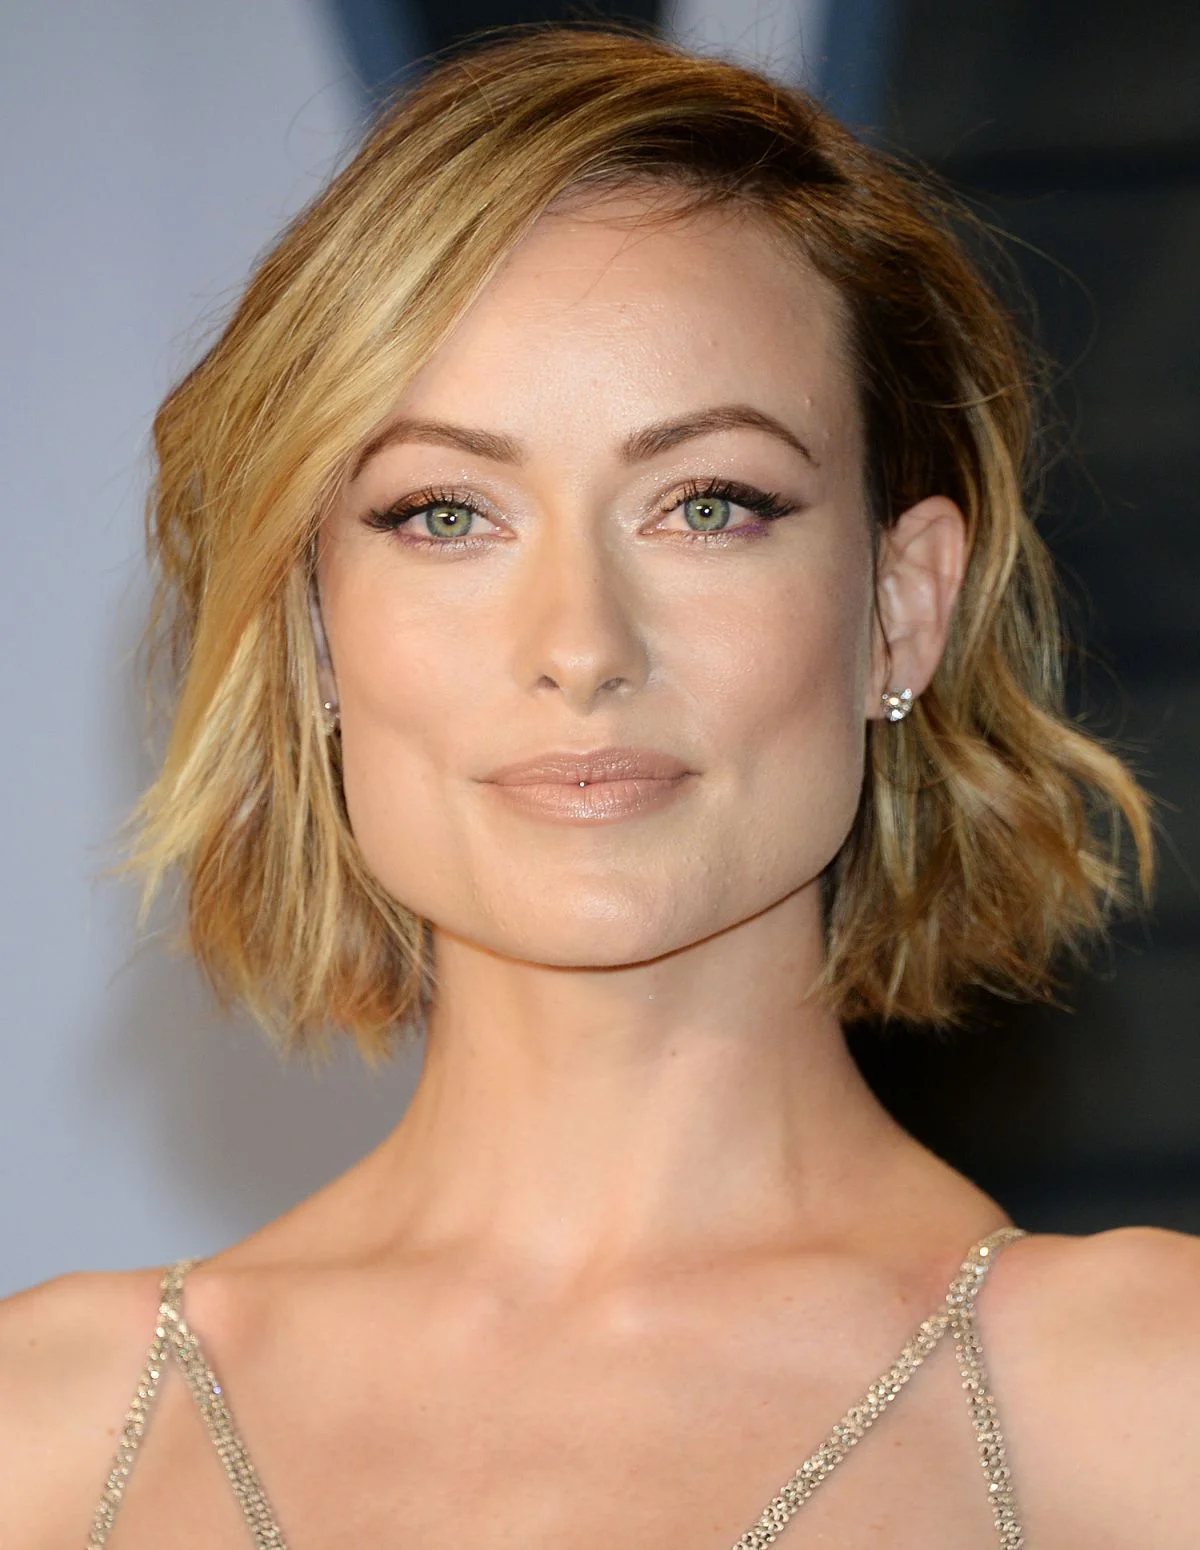


Processing image: ./test/wanita1.jpg
Predicting...

🎯 Model menebak bentuk wajah: SQUARE
📊 Confidence               : 94.09%

📋 Detail semua kelas:
  • Square   → 94.09% ███████████████████████████████████████████████
  • Oval     →  1.94% 
  • Heart    →  1.35% 
  • Oblong   →  1.33% 
  • Round    →  1.30% 
------------------------------------------------------------
Test Model on Male


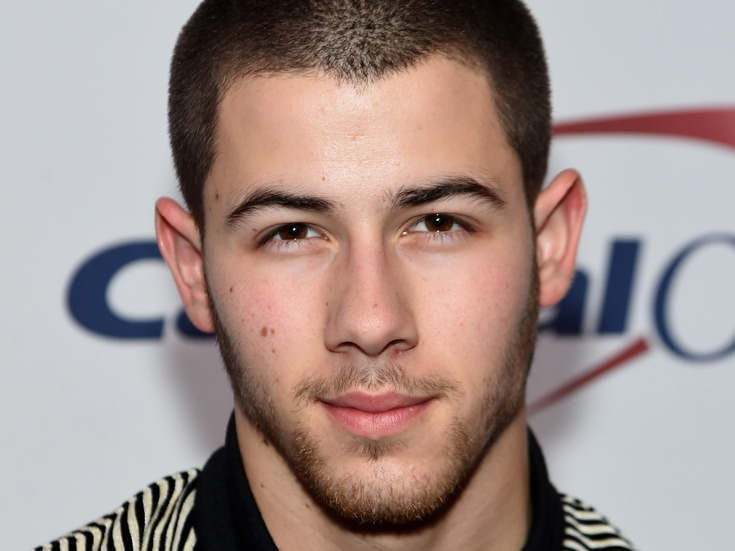


Processing image: ./test/pria1.jpg
Predicting...

🎯 Model menebak bentuk wajah: HEART
📊 Confidence               : 83.67%

📋 Detail semua kelas:
  • Heart    → 83.67% █████████████████████████████████████████
  • Oval     → 10.64% █████
  • Oblong   →  2.44% █
  • Square   →  2.12% █
  • Round    →  1.13% 


In [32]:
# Load & predict Female
print("Test Model on Female")
image_path = './test/wanita1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")
print("-"*60)

# Load & predict Male
print("Test Model on Male")
image_path = './test/pria1.jpg'
display(IPImage(filename=image_path, width=400))

print(f"\nProcessing image: {image_path}")
image = Image.open(image_path).convert("RGB")
img_tensor = transform(image).unsqueeze(0).to(device)

# Prediction
print("Predicting...")
with torch.inference_mode():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

# Results
print(f"\n{'='*60}")
print(f"🎯 Model menebak bentuk wajah: {class_names[pred_idx].upper()}")
print(f"📊 Confidence               : {probs[0][pred_idx]:.2f}%")
print(f"{'='*60}")
print("\n📋 Detail semua kelas:")

probs_dict = {class_names[i]: probs[0][i].item() for i in range(len(class_names))}
sorted_probs = dict(sorted(probs_dict.items(), key=lambda x: x[1], reverse=True))

for name, prob in sorted_probs.items():
    bar = "█" * int(prob / 2)
    print(f"  • {name:8} → {prob:5.2f}% {bar}")

## **Load Glasses Frame**

Memeriksa folder 'frames'...

Berhasil load → aviator.png  (ukuran: (600, 600, 4))
Berhasil load → oval.png  (ukuran: (600, 600, 4))
Berhasil load → wayfarer.png  (ukuran: (600, 600, 4))
Berhasil load → round.png  (ukuran: (600, 600, 4))
Berhasil load → pantos.png  (ukuran: (600, 600, 4))
Berhasil load → square.png  (ukuran: (600, 600, 4))
Berhasil load → rectangle.png  (ukuran: (600, 600, 4))
Berhasil load → cateye.png  (ukuran: (600, 600, 4))
Berhasil load → browline.png  (ukuran: (600, 600, 4))

Total berhasil load : 9 / 9
Semua frame berhasil di-load!

Preview semua frame (ukuran kecil):


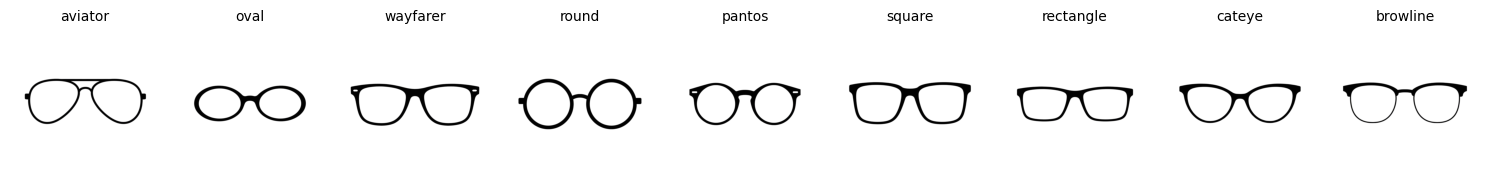

In [33]:
import os
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt

# 1. Tentukan folder
folder = "frames"

# 2. Daftar semua file yang harus ada
expected_frames = [
    "aviator", "oval", "wayfarer", "round", 
    "pantos", "square", "rectangle", "cateye", "browline"
]

# 3. Dictionary untuk menyimpan gambar yang berhasil di-load
frames_dict = {}
missing_files = []

print("Memeriksa folder 'frames'...\n")

# 4. Loop load satu per satu
for name in expected_frames:
    filename = f"{name}.png"
    path = os.path.join(folder, filename)
    
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        if img is not None:
            frames_dict[name] = img
            print(f"Berhasil load → {filename}  (ukuran: {img.shape})")
        else:
            print(f"Gagal baca gambar → {filename}")
            missing_files.append(filename)
    else:
        print(f"File tidak ditemukan → {filename}")
        missing_files.append(filename)

# 5. Ringkasan
print("\n" + "="*60)
print(f"Total berhasil load : {len(frames_dict)} / 9")
if missing_files:
    print(f"File yang hilang/gagal : {', '.join(missing_files)}")
else:
    print("Semua frame berhasil di-load!")

# 6. Tampilkan preview kecil semua frame
print("\nPreview semua frame (ukuran kecil):")
fig, axes = plt.subplots(1, len(frames_dict), figsize=(15, 3))
if len(frames_dict) == 1:
    axes = [axes]
for idx, (name, img) in enumerate(frames_dict.items()):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    axes[idx].imshow(rgb_img)
    axes[idx].set_title(name, fontsize=10)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

## **Download Mediapipe Model**

In [34]:
import os
import urllib.request
import zipfile
from pathlib import Path

model_dir = Path("mediapipe_models")
model_dir.mkdir(exist_ok=True)

# Download dari GitHub MediaPipe repo (link resmi)
url = "https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task"
local_path = model_dir / "face_landmarker.task"

if not local_path.exists():
    print("Downloading face_landmarker.task (~2.5MB)...")
    urllib.request.urlretrieve(url, local_path)
    print(f"✓ Model saved to: {local_path}")
else:
    print("Model sudah ada!")

print("Download selesai!")

Model sudah ada!
Download selesai!


## **Face Mesh Using Mediapipe**

In [35]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import time
import os
from IPython.display import Image as IPImage, display

os.makedirs("results", exist_ok=True)

# Setup MediaPipe
print("Melakukan setup mediapipe face landmark...")
model_path = "mediapipe_models/face_landmarker.task"
BaseOptions = python.BaseOptions
FaceLandmarker = vision.FaceLandmarker
FaceLandmarkerOptions = vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode
options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO,
    num_faces=1,
    min_face_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
face_landmarker = FaceLandmarker.create_from_options(options)
print("face landmark siap digunakan")

Melakukan setup mediapipe face landmark...
face landmark siap digunakan


Cell 3: Align titik BIRU ke area HIJAU + tahan 2 detik → screenshot otomatis
Setelah screenshot → program berhenti & dua gambar muncul side-by-side
Tekan 'q' untuk keluar manual

Screenshot berhasil!
  • Dengan mesh: ./results/facemesh_image.jpg
  • Bersih      : ./results/clean_image.jpg


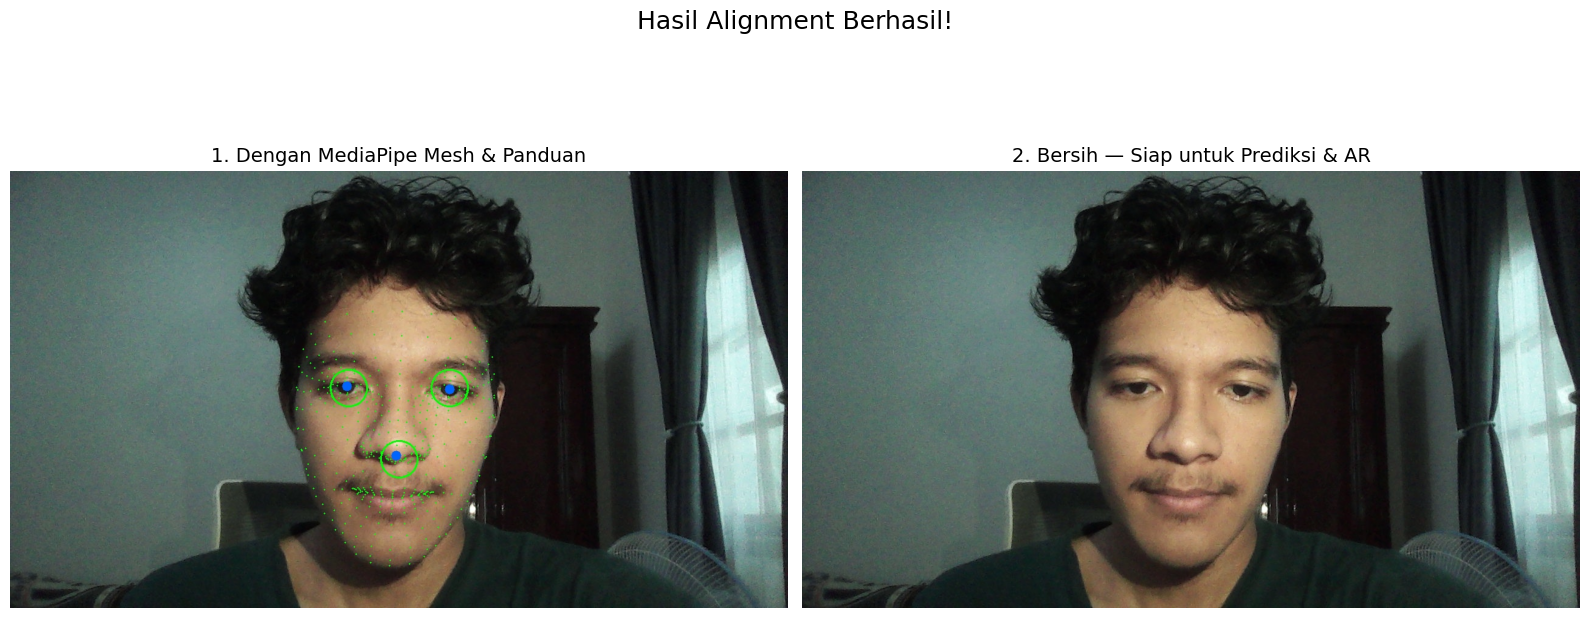

In [44]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import time
import os
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

# Buat folder results kalau belum ada
os.makedirs("./results", exist_ok=True)

# Indeks landmark
LEFT_EYE = 468
RIGHT_EYE = 473
NOSE_TIP = 1

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# Variabel untuk countdown
aligned_frames = 0
required_frames = 60
threshold = 30
screenshot_with_mesh = "./results/facemesh_image.jpg"
screenshot_clean = "./results/clean_image.jpg"
screenshot_taken = False

print("Cell 3: Align titik BIRU ke area HIJAU + tahan 2 detik → screenshot otomatis")
print("Setelah screenshot → program berhenti & dua gambar muncul side-by-side")
print("Tekan 'q' untuk keluar manual")

while cap.isOpened() and not screenshot_taken:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    
    # Frame untuk ditampilkan (dengan mesh & bantuan visual)
    display_frame = frame.copy()
    
    # Frame bersih (akan disimpan tanpa apa-apa)
    clean_frame = frame.copy()
    
    h, w = frame.shape[:2]
    center_x = w // 2
    center_y = h // 2

    # Titik panduan MERAH (selalu di tengah)
    eye_distance = int(w * 0.065) # jarak kedua mata
    eye_y_offset = int(h * 0.003) # jarak atas bawah
    nose_y_offset = int(h * 0.16)
    GUIDE_LEFT_EYE = (center_x - eye_distance, center_y - eye_y_offset)
    GUIDE_RIGHT_EYE = (center_x + eye_distance, center_y - eye_y_offset)
    GUIDE_NOSE = (center_x, center_y + nose_y_offset)

    # Gambar area lingkaran HIJAU (untuk visual "area")
    for pt in [GUIDE_LEFT_EYE, GUIDE_RIGHT_EYE, GUIDE_NOSE]:
        cv2.circle(display_frame, pt, threshold, (0, 255, 0), 2)       

    # Process frame
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
    timestamp_ms = int(time.time() * 1000)
    results = face_landmarker.detect_for_video(mp_image, timestamp_ms)

    if results.face_landmarks:
        landmarks = results.face_landmarks[0]

        # Gambar landmark hijau kecil (hanya di display_frame)
        for lm in landmarks:
            x = int(lm.x * w)
            y = int(lm.y * h)
            cv2.circle(display_frame, (x, y), 1, (0, 255, 0), -1)

        # Titik biru di wajah user (hanya di display_frame)
        left_eye = (int(landmarks[LEFT_EYE].x * w), int(landmarks[LEFT_EYE].y * h))
        right_eye = (int(landmarks[RIGHT_EYE].x * w), int(landmarks[RIGHT_EYE].y * h))
        nose = (int(landmarks[NOSE_TIP].x * w), int(landmarks[NOSE_TIP].y * h))

        cv2.circle(display_frame, left_eye, 8, (255,100,0), -1)
        cv2.circle(display_frame, right_eye, 8, (255,100,0), -1)
        cv2.circle(display_frame, nose, 8, (255,100,0), -1)

        # Hitung jarak ke titik panduan
        dist_left = np.linalg.norm(np.array(left_eye) - np.array(GUIDE_LEFT_EYE))
        dist_right = np.linalg.norm(np.array(right_eye) - np.array(GUIDE_RIGHT_EYE))
        dist_nose = np.linalg.norm(np.array(nose) - np.array(GUIDE_NOSE))

        # Kalau semua titik biru masuk area
        if dist_left < threshold and dist_right < threshold and dist_nose < threshold:
            aligned_frames += 1
            if aligned_frames >= required_frames:
                # Simpan dua gambar
                cv2.imwrite(screenshot_with_mesh, display_frame)
                cv2.imwrite(screenshot_clean, clean_frame)       
                print(f"\nScreenshot berhasil!")
                print(f"  • Dengan mesh: {screenshot_with_mesh}")
                print(f"  • Bersih      : {screenshot_clean}")
                screenshot_taken = True
        else:
            aligned_frames = 0

        if aligned_frames > 0:
            remain = max(0, 2 - aligned_frames // 30)
            cv2.putText(display_frame, f"Tahan posisimu", (center_x - 200, center_y - 100),
                        cv2.FONT_HERSHEY_TRIPLEX, 2, (0, 255, 255), 8, cv2.LINE_AA)

    # Teks instruksi
    cv2.putText(display_frame, "Align titik BIRU ke area HIJAU", (10, 30),
                cv2.FONT_HERSHEY_DUPLEX, 0.9, (255,255,255), 2)
    cv2.putText(display_frame, "Tahan 2 detik lalu discreenshot", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200,200,255), 2)

    cv2.imshow("Cell 3 - MediaPipe Face Landmarker", display_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

if screenshot_taken:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    img_mesh = cv2.cvtColor(cv2.imread(screenshot_with_mesh), cv2.COLOR_BGR2RGB)
    img_clean = cv2.cvtColor(cv2.imread(screenshot_clean), cv2.COLOR_BGR2RGB)
    
    axes[0].imshow(img_mesh)
    axes[0].set_title("1. Dengan MediaPipe Mesh & Panduan", fontsize=14)
    axes[0].axis('off')
    
    axes[1].imshow(img_clean)
    axes[1].set_title("2. Bersih — Siap untuk Prediksi & AR", fontsize=14)
    axes[1].axis('off')
    
    plt.suptitle("Hasil Alignment Berhasil!", fontsize=18, y=0.95)
    plt.tight_layout()
    plt.show()

## **Helper Functions**

In [37]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image

# === 1. Cek alignment (apakah titik wajah masuk ke area panduan) ===
def is_aligned(landmarks, guide_points, threshold=55):
    """
    landmarks: list landmark dari MediaPipe FaceLandmarker
    guide_points: tuple 3 titik panduan ((left_eye), (right_eye), (nose))
    threshold: jarak maksimal pixel untuk dianggap aligned
    """
    le = (int(landmarks[468].x * w), int(landmarks[468].y * h))
    re = (int(landmarks[473].x * w), int(landmarks[473].y * h))
    no = (int(landmarks[1].x * w),   int(landmarks[1].y * h))
    
    dist_left  = np.linalg.norm(np.array(le) - np.array(guide_points[0]))
    dist_right = np.linalg.norm(np.array(re) - np.array(guide_points[1]))
    dist_nose  = np.linalg.norm(np.array(no) - np.array(guide_points[2]))
    
    return dist_left < threshold and dist_right < threshold and dist_nose < threshold

# === 2. Hitung jarak antar mata (untuk scaling kacamata) ===
def get_eye_distance(landmarks, frame_width):
    le = landmarks[468]
    re = landmarks[473]
    return abs(le.x - re.x) * frame_width

# === 3. Overlay kacamata transparan dengan scaling & rotasi ===
def overlay_glasses(frame, glasses_png, landmarks, eye_distance_ratio=1.8):
    """
    frame: frame webcam
    glasses_png: gambar PNG kacamata dengan alpha channel (4 channel)
    landmarks: landmark dari MediaPipe
    eye_distance_ratio: rasio lebar kacamata terhadap jarak mata (1.5-2.0 biasanya bagus)
    """
    if glasses_png is None:
        return frame
    
    h, w = frame.shape[:2]
    eye_dist = get_eye_distance(landmarks, w)
    
    # Resize kacamata berdasarkan jarak mata
    glasses_width = int(eye_dist * eye_distance_ratio)
    glasses_resized = cv2.resize(glasses_png, (glasses_width, int(glasses_png.shape[0] * glasses_width / glasses_png.shape[1])))
    
    # Posisi tengah antara dua mata
    le = (int(landmarks[468].x * w), int(landmarks[468].y * h))
    re = (int(landmarks[473].x * w), int(landmarks[473].y * h))
    center_x = (le[0] + re[0]) // 2
    center_y = (le[1] + re[1]) // 2 - int(h * 0.05)  # sedikit ke atas
    
    # Hitung posisi top-left untuk overlay
    x1 = center_x - glasses_resized.shape[1] // 2
    y1 = center_y - glasses_resized.shape[0] // 2
    x2 = x1 + glasses_resized.shape[1]
    y2 = y1 + glasses_resized.shape[0]
    
    # Clip agar tidak keluar frame
    x1 = max(0, x1)
    y1 = max(0, y1)
    x2 = min(w, x2)
    y2 = min(h, y2)
    
    if x1 >= x2 or y1 >= y2:
        return frame
    
    # Overlay dengan alpha channel
    glasses_crop = glasses_resized[y1 - (center_y - glasses_resized.shape[0]//2):y2 - (center_y - glasses_resized.shape[0]//2),
                                   x1 - (center_x - glasses_resized.shape[1]//2):x2 - (center_x - glasses_resized.shape[1]//2)]
    
    alpha = glasses_crop[:, :, 3] / 255.0
    alpha_inv = 1.0 - alpha
    
    for c in range(3):
        frame[y1:y2, x1:x2, c] = (alpha * glasses_crop[:, :, c] + alpha_inv * frame[y1:y2, x1:x2, c])
    
    return frame

# === 4. Perspective warp ringan untuk efek menoleh (opsional tapi keren) ===
def apply_perspective_warp(glasses_img, yaw_angle=0, pitch_angle=0):
    """
    yaw_angle & pitch_angle dalam derajat (diperkirakan dari landmark)
    """
    h, w = glasses_img.shape[:2]
    scale_y = 1 + pitch_angle / 100  # sedikit perspektif vertikal
    
    warped = cv2.resize(glasses_img, None, fx=1, fy=scale_y)
    if scale_y > 1:
        crop = warped[int((scale_y-1)*h//2):int((scale_y-1)*h//2)+h, :]
    else:
        pad = int((1-scale_y)*h//2)
        crop = cv2.copyMakeBorder(warped, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=0)
        crop = crop[:h, :]
    
    return crop

# === 5. Prediksi bentuk wajah dari gambar ===
def predict_face_shape(image_path, model, device='cpu'):
    """
    image_path: path ke gambar wajah (sudah aligned & bersih)
    model: model PyTorch yang sudah diload
    return: nama bentuk wajah + confidence
    """
    class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
    
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    img = Image.open(image_path).convert("RGB")
    tensor = transform(img).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(tensor)
        probs = torch.softmax(output, dim=1) * 100
        pred_idx = torch.argmax(output, 1).item()
    
    return class_names[pred_idx], probs[0][pred_idx].item()

print("Helper Functions siap digunakan")

Helper Functions siap digunakan


## **Predict From Screenshot**

Gambar wajah yang sudah aligned & bersih:


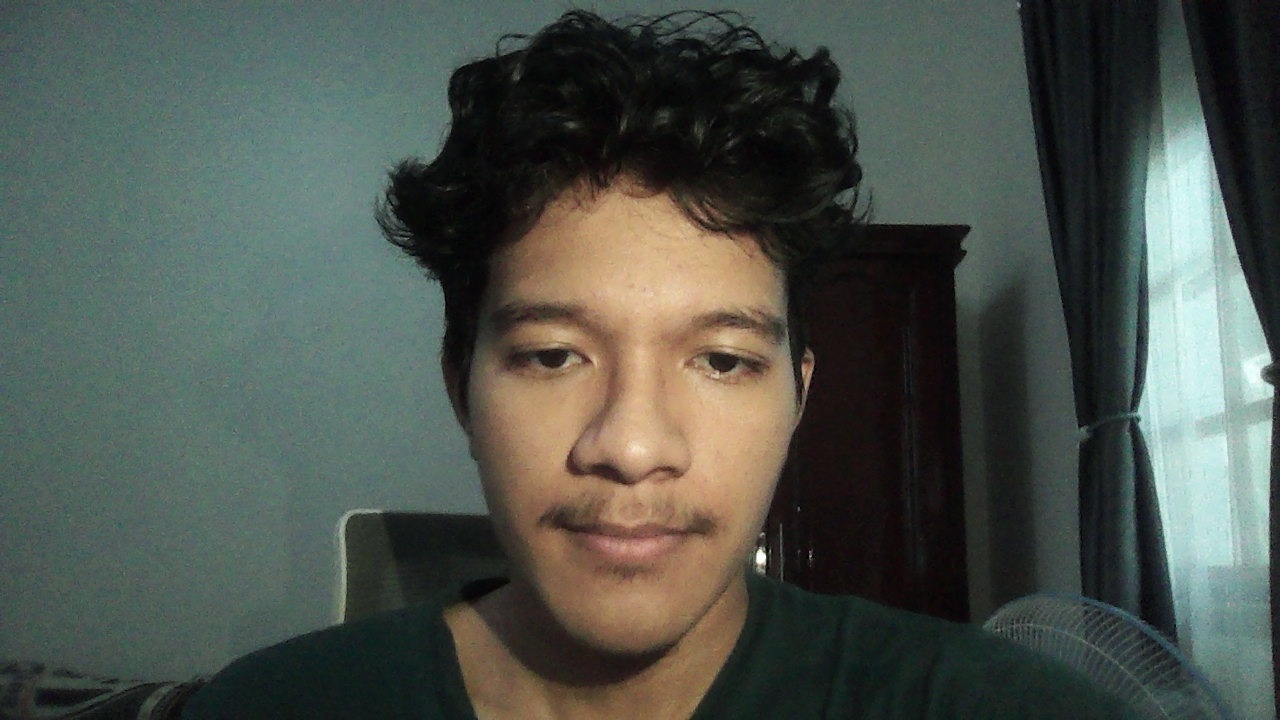


🎯 BENTUK WAJAH TERDETEKSI: OBLONG
📊 Confidence: 95.82%

📋 Detail Probabilitas Semua Kelas:
  • Oblong   →  95.82%  ███████████████████████████████
  • Square   →   1.87%  
  • Oval     →   0.93%  
  • Round    →   0.74%  
  • Heart    →   0.64%  


In [45]:
from PIL import Image
import torch
import torchvision.transforms as T
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

screenshot_path = "results/clean_image.jpg"  # nama file yang disimpan di Cell 6

# Tampilkan gambar screenshot bersih
print("Gambar wajah yang sudah aligned & bersih:")
display(IPImage(screenshot_path, width=500))

# Transform untuk input model
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load gambar & prediksi
img = Image.open(screenshot_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0).to(device)

with torch.inference_mode():
    outputs = model(img_tensor)
    probs = torch.softmax(outputs, dim=1) * 100
    pred_idx = torch.argmax(outputs, 1).item()

predicted_shape = class_names[pred_idx]
confidence = probs[0][pred_idx].item()

# Tampilkan hasil prediksi
print(f"\n{'='*60}")
print(f"🎯 BENTUK WAJAH TERDETEKSI: {predicted_shape.upper()}")
print(f"📊 Confidence: {confidence:.2f}%")
print(f"{'='*60}")

# Bar probabilitas semua kelas (visual & rapi)
print("\n📋 Detail Probabilitas Semua Kelas:")
sorted_indices = torch.argsort(probs, dim=1, descending=True)[0]
for i in sorted_indices:
    name = class_names[i]
    prob = probs[0][i].item()
    bar = "█" * int(prob // 3)
    print(f"  • {name:8} → {prob:6.2f}%  {bar}")